In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
config = {
    "base_dir":        "/eos/home-b/bpinolin/ML_output/",
    "plot_config":     "VBSOS",
    "cut":             "sr",
    "samples_version": "v0",
    "cols": [
             'detajj',
             'ptll',
             'detall',        
             'log(jetpt1)', 
             'jetpt2', 
             'met',
             'dphill',
             'dphijj',
             'Mll',
             'btag_central',
             'btag_forward',
             'dR_jl1',
             'dR_jl2',
             'Zeppll',
             'log(mjj)',
             'Zepp1',
             'Zepp2',
             'eta1',
             'eta2',
             'Jet_nConst_central',
             'Jet_nConst_forward',
             'qgl_forward',
             'qgl_central',
             'area_forward',
             'area_central'
            ],
}

In [3]:
import os

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])
# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
file_sig_bal = os.path.join(samples_dir, "for_training/signal_balanced.pkl")
file_bkg_bal = os.path.join(samples_dir, "for_training/background_balanced.pkl")

In [4]:
import pickle
signal = pickle.load(open(file_sig_bal, "rb"))
bkg = pickle.load(open(file_bkg_bal, "rb"))

## Comparing train and test

## Plotting weights

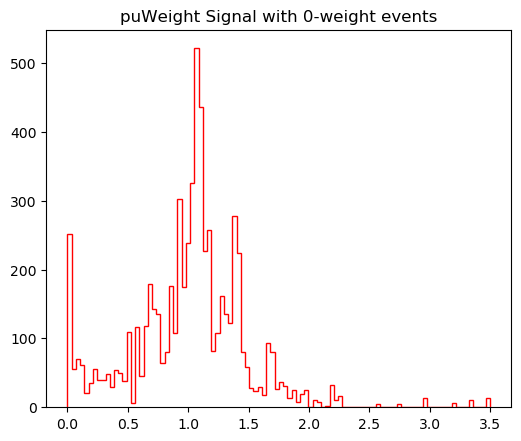

In [5]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["puWeight"], bins=100, histtype="step", label="Signal", color='red', range=(0,3.5))
plt.title("puWeight Signal with 0-weight events")
plt.show()

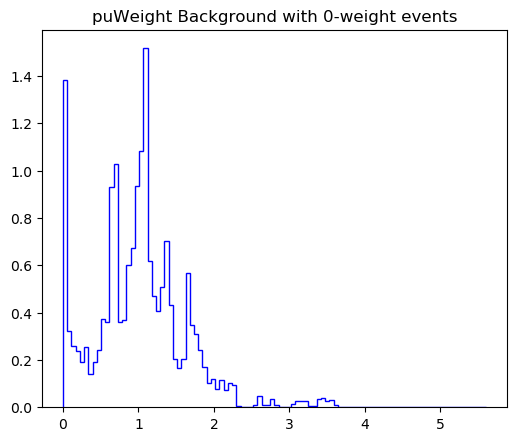

In [6]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(bkg["puWeight"], bins=100, histtype="step", density=True, label="top", color='blue')
plt.title("puWeight Background with 0-weight events")
plt.show()

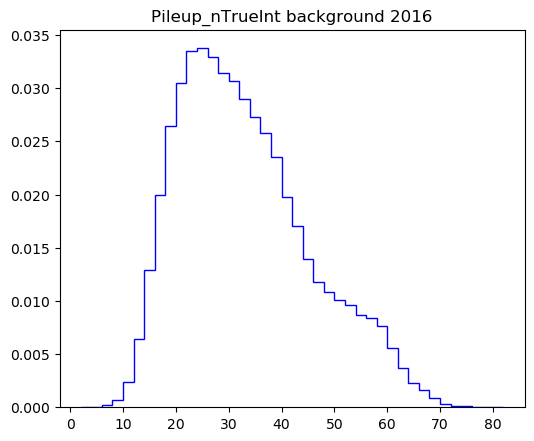

In [7]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(bkg["Pileup_nTrueInt"], bins=40, histtype="step", density=True, label="top", color='blue')
#plt.legend()
plt.title("Pileup_nTrueInt background 2016")
plt.show()

In [8]:
a = bkg["puWeight"]
b = bkg["Pileup_nTrueInt"]

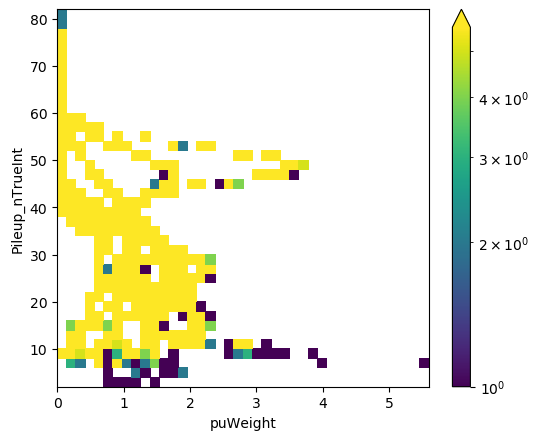

In [9]:
import matplotlib

fig = plt.figure(figsize=(6,5), dpi=100)

plt.hist2d(a,b, bins=40, norm=matplotlib.colors.LogNorm(vmin=1,vmax=a.max()))

plt.colorbar(extend='max')
plt.xlabel("puWeight")
plt.ylabel("Pileup_nTrueInt")
plt.show()

## Check weights Wnn

## Plotting all variables

## Extracting mjj for ROC

In [12]:
signal = signal[(signal['mjj'] >= 500) & (signal["detajj"] >= 3.5)]
bkg = bkg[(bkg['mjj'] >= 500) & (bkg["detajj"] >= 3.5)]

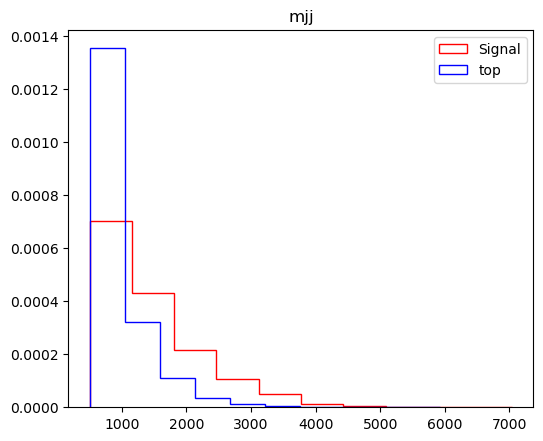

In [13]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["mjj"], bins=10, histtype="step", weights=signal["weight_"], label="Signal", color='red', density = True)
_ = plt.hist(bkg["mjj"], bins=10, histtype="step", weights=bkg["weight_"], label="top", color='blue', density = True)
plt.legend()
plt.title("mjj")
plt.show()

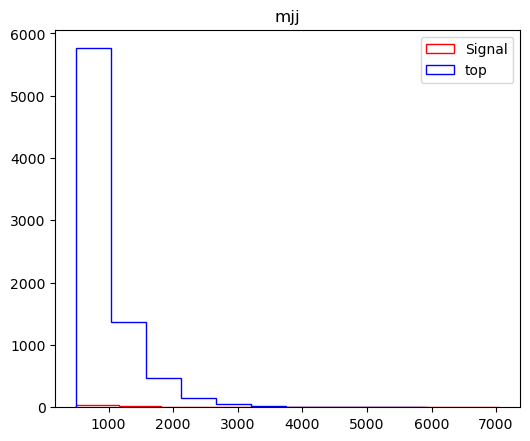

In [14]:
fig = plt.figure(figsize=(6,5), dpi=100)
n_sig, b, _ = plt.hist(signal["mjj"], bins=10, histtype="step", weights=signal["weight_"], label="Signal", color='red')
n_bkg, b, _ = plt.hist(bkg["mjj"], bins=10, histtype="step", weights=bkg["weight_"], label="top", color='blue')
plt.legend()
plt.title("mjj")
plt.show()

In [15]:
effS = np.array([])
effB = np.array([])

for i in range(len(n_sig)):
    i = i+1
    S = sum(n_sig[-i:len(n_sig)])
    effS = np.append(effS, S/sum(n_sig))
    
for j in range(len(n_bkg)):
    j = j+1
    B = sum(n_bkg[-j:len(n_bkg)])
    effB = np.append(effB, B/sum(n_bkg))

In [16]:
# Considero efficienza di segnale e fondo delle selezioni
import numpy as np

new_effS = np.array([])
new_effB = np.array([])

for i in range (len(effS)):
    add = effS[i]*0.22
    new_effS = np.append(new_effS, add)

for i in range (len(effB)):
    add = effB[i]*0.0032
    new_effB = np.append(new_effB, add)

In [17]:
print(new_effS.tolist())
print(new_effB.tolist())

[1.232018151875268e-05, 0.00024016065022250423, 0.000556748341921622, 0.0013212032450259437, 0.003046369710840933, 0.010377943427883837, 0.02561364339853434, 0.05679454637891939, 0.11868397594552756, 0.22]
[1.3714995690208226e-07, 8.384463877538696e-07, 9.544143800070933e-07, 2.872062773029846e-06, 9.56249702254306e-06, 3.3494772671227186e-05, 9.416520692110383e-05, 0.0002875124101803627, 0.0008464137989989425, 0.0032]
